In [2]:
import pandas as pd
import numpy as np

# Load dataset
file_path=r"C:\Users\ADMIN\Downloads\bikes (1).csv"
df = pd.read_csv(file_path)

# Basic overview
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [3]:
df.shape

(7857, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [5]:
df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [6]:
df['kms_driven'].unique()[:10]

array(['17000 Km', '50000 Km', '14795 Km', 'Mileage 28 Kms', '2000 Km',
       '24561 Km', '19718 Km', 'Mileage 40 Kmpl', '1350 Km',
       'Mileage 58 Kmpl'], dtype=object)

In [7]:
df[df['kms_driven'].str.startswith('Mileage', na=False)]

,model_name,model_year,kms_driven,owner,location,mileage,power,price
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,Mileage 40 Kmpl,first owner,hyderabad,\n\n 40 Kmpl,20.21 bhp,120000
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,\n\n 58 Kmpl,13 bhp,40000
13,Honda CB Shine 125cc 2018,2018,Mileage 65 Kmpl,first owner,delhi,\n\n 65 Kmpl,10 bhp,50000
14,Royal Enfield Standard 350cc 2019,2019,Mileage 30 Kmpl,first owner,delhi,\n\n 30 Kmpl,18 bhp,131000
...,...,...,...,...,...,...,...,...
7842,Bajaj Platina 100cc 2010,2010,Mileage 104 Kmpl,first owner,delhi,\n\n 104 Kmpl,8.20 bhp,14800
7843,Bajaj Pulsar 150cc 2005,2005,Mileage 65 Kmpl,first owner,hyderabad,\n\n 65 Kmpl,14.85 bhp,15000
7845,Bajaj Discover 100M 2012,2012,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,9.10 bhp,35000
7851,Bajaj Pulsar RS200 ABS 2015,2015,Mileage 35 Kmpl,first owner,sidlaghatta,\n\n 35 Kmpl,24.16 bhp,80000


In [8]:
df['kms_driven'].str.startswith('Mileage', na=False).sum()

1985

In [9]:
df = df[~df['kms_driven'].str.startswith('Mileage', na=False)]

In [10]:
df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+)')

In [11]:
df[df['kms_driven'].isna()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7058,Bajaj Discover 135cc 2007,2007,NaN,fourth owner or more,jaipur,\n\n 65 kmpl,9.64 kw,14000
7161,Hero Splendor iSmart 110cc 2017,2017,NaN,first owner,delhi,\n\n 55 kmpl,9.30 bhp,30000
7172,Bajaj Pulsar 180cc 2010,2010,NaN,first owner,gautam buddha nagar,\n\n 65 kmpl,15 bhp,12000


In [12]:
df = df.dropna(subset=['kms_driven'])

In [13]:
df['kms_driven'].isna().sum()

0

In [14]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  5869 non-null   object
 1   model_year  5869 non-null   int64 
 2   kms_driven  5869 non-null   int32 
 3   owner       5869 non-null   object
 4   location    5855 non-null   object
 5   mileage     5858 non-null   object
 6   power       5838 non-null   object
 7   price       5869 non-null   int64 
dtypes: int32(1), int64(2), object(5)
memory usage: 389.7+ KB


In [16]:
df['mileage'].unique()[:15]

array(['\n\n 35 kmpl', '\n\n 30 kmpl', '\n\n ', '\n\n 65 kmpl',
       '\n\n 25 kmpl', '\n\n 32 kmpl', '\n\n 40 kmpl', '\n\n 37 kmpl',
       '\n\n 53 kmpl', '\n\n 55 kmpl', '\n\n 45 kmpl', '\n\n 38 kmpl',
       '\n\n 45-55', '\n\n 29 kmpl', '\n\n 75 kmpl'], dtype=object)

In [17]:
# Convert to string and normalize text
df['mileage_clean'] = (
    df['mileage']
    .astype(str)
    .str.lower()
    .str.replace('kmpl', '', regex=False)
    .str.replace('\n', '', regex=False)
    .str.strip()
)

In [18]:
import numpy as np

def handle_mileage(value):
    # If range like "20-25"
    if '-' in value:
        nums = value.split('-')
        try:
            return np.mean([float(nums[0]), float(nums[1])])
        except:
            return np.nan
    # If numeric
    try:
        return float(value)
    except:
        return np.nan

In [19]:
df['mileage_clean'] = df['mileage_clean'].apply(handle_mileage)

In [20]:
df['mileage_clean'] = df['mileage_clean'].fillna(df['mileage_clean'].median())

In [21]:
df['mileage'] = df['mileage_clean']
df.drop(columns=['mileage_clean'], inplace=True)

In [22]:
df['mileage'] = df['mileage'].astype(float)

In [23]:
df.info()
df['mileage'].min(), df['mileage'].max()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  5869 non-null   object 
 1   model_year  5869 non-null   int64  
 2   kms_driven  5869 non-null   int32  
 3   owner       5869 non-null   object 
 4   location    5855 non-null   object 
 5   mileage     5869 non-null   float64
 6   power       5838 non-null   object 
 7   price       5869 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 389.7+ KB


(5.0, 95.0)

In [24]:
import numpy as np
import re

df['power_clean'] = (
    df['power']
    .astype(str)
    .str.lower()
    .str.replace('\n', '', regex=False)
    .str.strip()
)

In [25]:
def parse_power(value):
    if value == 'nan':
        return np.nan

    # Handle ranges like "100-110 bhp"
    if '-' in value:
        nums = re.findall(r'\d+\.?\d*', value)
        if len(nums) >= 2:
            nums = [float(n) for n in nums[:2]]
            return np.mean(nums)

    # Handle kW values
    if 'kw' in value:
        num = re.findall(r'\d+\.?\d*', value)
        if num:
            return float(num[0]) * 1.341

    # Handle PS values
    if 'ps' in value:
        num = re.findall(r'\d+\.?\d*', value)
        if num:
            return float(num[0]) * 0.986

    # Handle bhp values (including "@ rpm", comments)
    num = re.findall(r'\d+\.?\d*', value)
    if num:
        return float(num[0])

    return np.nan

In [26]:
df['power_clean'] = df['power_clean'].apply(parse_power)

In [27]:
df['power_clean'].isna().sum()

31

In [28]:
df['power_clean'] = df['power_clean'].fillna(df['power_clean'].median())

In [29]:
df['power'] = df['power_clean'].astype(float)
df.drop(columns=['power_clean'], inplace=True)

In [30]:
df.info()
df['power'].min(), df['power'].max()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  5869 non-null   object 
 1   model_year  5869 non-null   int64  
 2   kms_driven  5869 non-null   int32  
 3   owner       5869 non-null   object 
 4   location    5855 non-null   object 
 5   mileage     5869 non-null   float64
 6   power       5869 non-null   float64
 7   price       5869 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 389.7+ KB


(7.0, 197.3)

In [31]:
df = df.dropna(subset=['location'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5855 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  5855 non-null   object 
 1   model_year  5855 non-null   int64  
 2   kms_driven  5855 non-null   int32  
 3   owner       5855 non-null   object 
 4   location    5855 non-null   object 
 5   mileage     5855 non-null   float64
 6   power       5855 non-null   float64
 7   price       5855 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 388.8+ KB


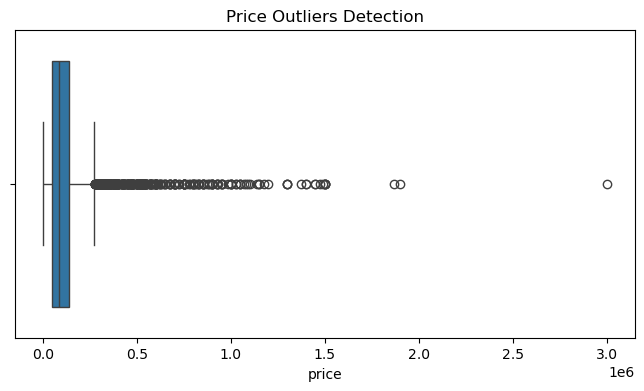

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Price Outliers Detection")
plt.show()

In [34]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-89349.25, 274248.75)

In [35]:
outliers = df[
    (df['price'] < lower_bound) | 
    (df['price'] > upper_bound)
]

outliers.shape

(370, 8)

In [36]:
df = df[df['price'] > 0]

In [37]:
df['log_price'] = np.log(df['price'])

In [38]:
outliers[['model_name', 'power', 'price']].head(10)

,model_name,power,price
2,Hyosung GT250R 2012,28.00,300000
167,KTM RC 390cc 2020,42.30,290000
393,Bajaj Avenger Street 150 2016,14.30,550000
483,Harley-Davidson Street Bob 2013,65.00,545000
683,Royal Enfield Continental GT 535cc 2018,29.10,275000
793,KTM 390 Adventure BS6 2020,42.30,314800
976,Royal Enfield Continental GT Twin 650cc 2017,47.00,310000
1251,Kawasaki Z1000 2019,139.00,760000
1341,Royal Enfield Continental GT Twin 650cc 2017,47.00,300000
1430,Hero Splendor Plus Black and Accent Edition 2021,7.91,700000


In [39]:
df = df[~(
    (df['power'] < 20) &
    (df['price'] > 400000)
)]

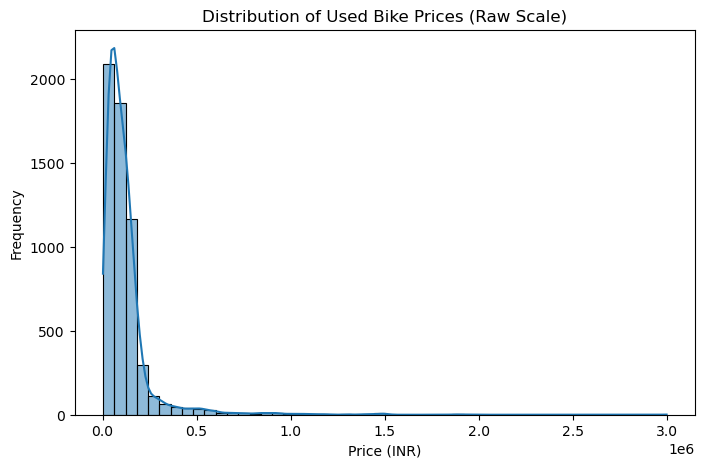

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Used Bike Prices (Raw Scale)")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

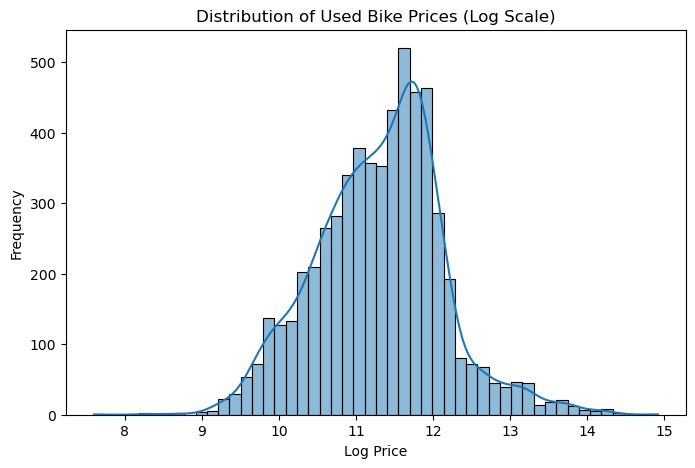

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title("Distribution of Used Bike Prices (Log Scale)")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

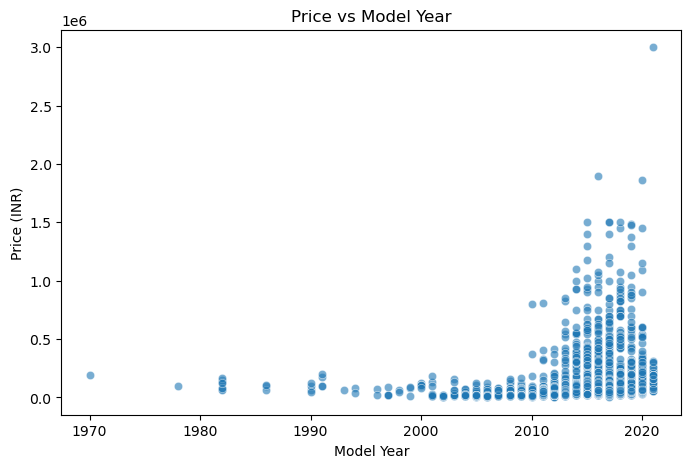

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['model_year'], y=df['price'], alpha=0.6)
plt.title("Price vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Price (INR)")
plt.show()

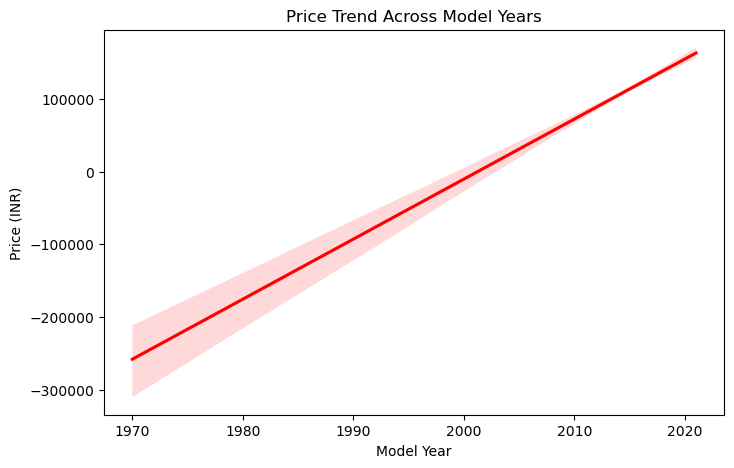

In [43]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['model_year'], y=df['price'], scatter=False, color='red')
plt.title("Price Trend Across Model Years")
plt.xlabel("Model Year")
plt.ylabel("Price (INR)")
plt.show()

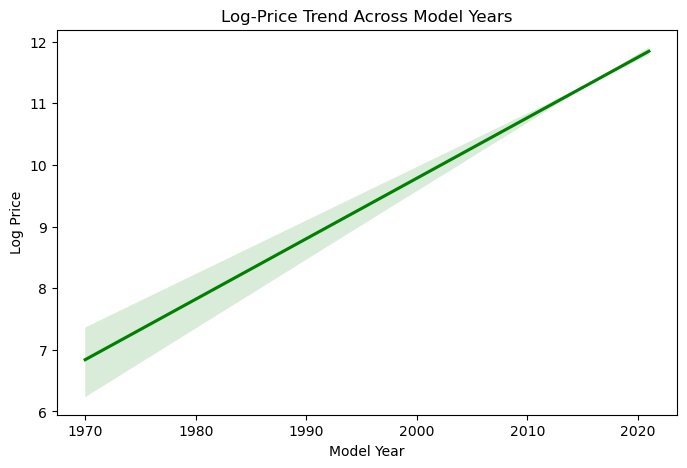

In [44]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['model_year'], y=df['log_price'], scatter=False, color='green')
plt.title("Log-Price Trend Across Model Years")
plt.xlabel("Model Year")
plt.ylabel("Log Price")
plt.show()

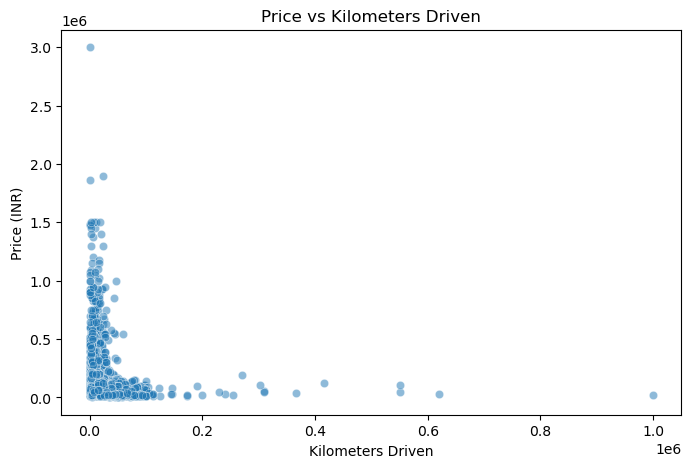

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['kms_driven'], y=df['price'], alpha=0.5)
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price (INR)")
plt.show()

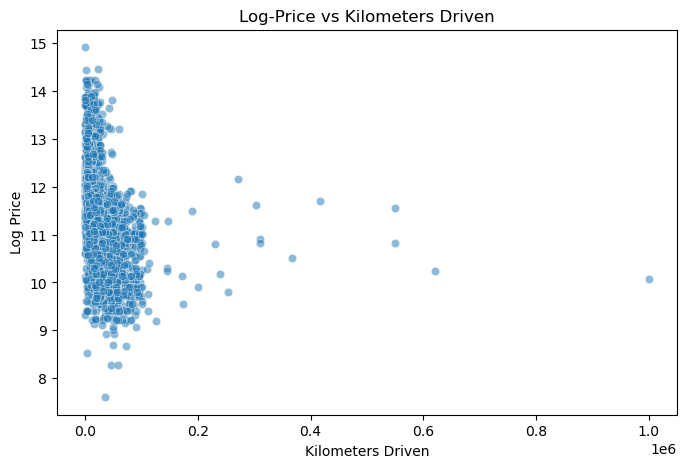

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['kms_driven'], y=df['log_price'], alpha=0.5)
plt.title("Log-Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Log Price")
plt.show()

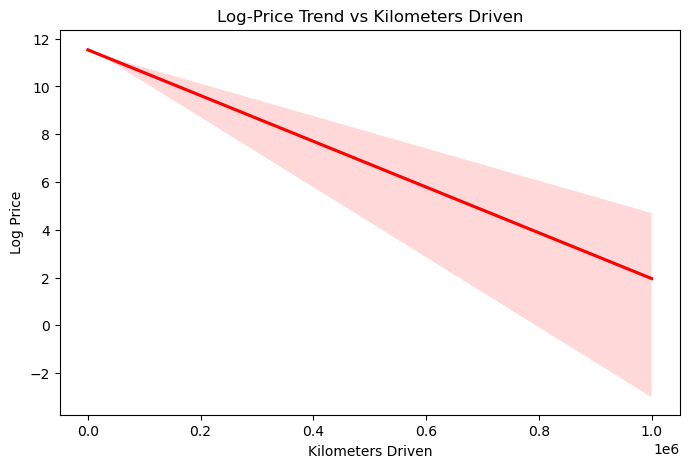

In [47]:
plt.figure(figsize=(8,5))
sns.regplot(
    x=df['kms_driven'], 
    y=df['log_price'], 
    scatter=False, 
    color='red'
)
plt.title("Log-Price Trend vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Log Price")
plt.show()

In [48]:
df['kms_bin'] = pd.cut(
    df['kms_driven'],
    bins=[0, 10000, 30000, 60000, 100000, 200000, 1000000],
    labels=['0-10k','10-30k','30-60k','60-100k','100k-200k','200k+']
)

df.groupby('kms_bin')['price'].median()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_41964\3871045993.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('kms_bin')['price'].median()


kms_bin
0-10k        135000.0
10-30k        85000.0
30-60k        46500.0
60-100k       47000.0
100k-200k     28999.0
200k+         50000.0
Name: price, dtype: float64

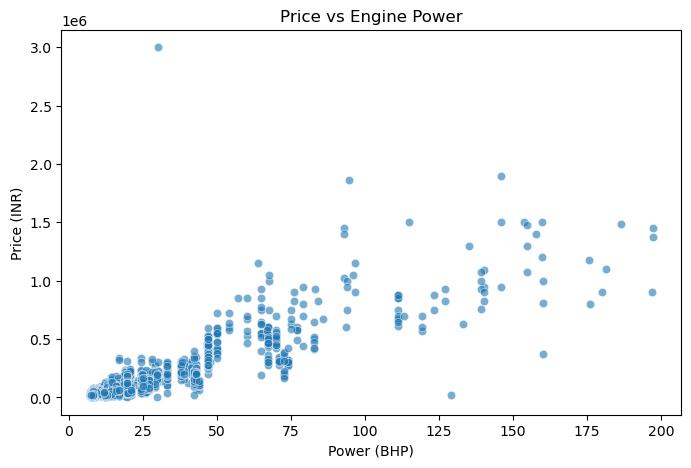

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['power'], y=df['price'], alpha=0.6)
plt.title("Price vs Engine Power")
plt.xlabel("Power (BHP)")
plt.ylabel("Price (INR)")
plt.show()

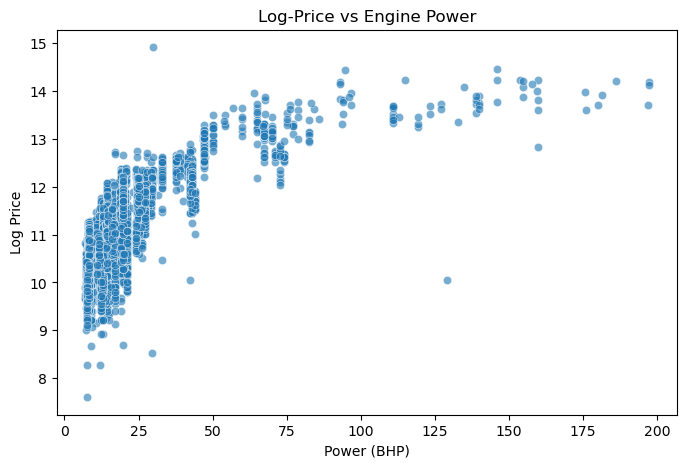

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['power'], y=df['log_price'], alpha=0.6)
plt.title("Log-Price vs Engine Power")
plt.xlabel("Power (BHP)")
plt.ylabel("Log Price")
plt.show()

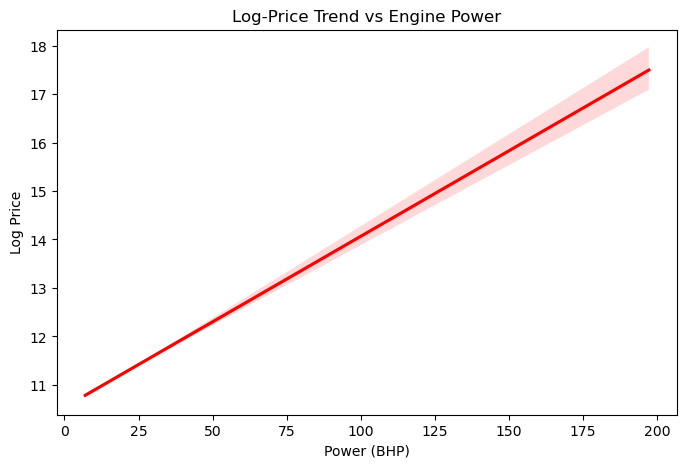

In [51]:
plt.figure(figsize=(8,5))
sns.regplot(
    x=df['power'], 
    y=df['log_price'], 
    scatter=False, 
    color='red'
)
plt.title("Log-Price Trend vs Engine Power")
plt.xlabel("Power (BHP)")
plt.ylabel("Log Price")
plt.show()

In [52]:
df['brand'] = df['model_name'].str.split().str[0]

In [53]:
df['brand'].value_counts().head(10)

brand
Royal              1641
Bajaj              1208
Hero                790
Yamaha              535
KTM                 490
Suzuki              222
TVS                 197
Harley-Davidson     157
UM                  127
Honda               121
Name: count, dtype: int64

In [54]:
brand_price = (
    df.groupby('brand')['price']
    .median()
    .sort_values(ascending=False)
)

brand_price.head(10)

brand
Moto               1866057.0
MV                 1225000.0
Ducati             1070500.0
Aprilia            1000000.0
Triumph             800000.0
Kawasaki            465000.0
Harley-Davidson     425000.0
Fb                  320850.0
BMW                 274800.0
Benelli             260000.0
Name: price, dtype: float64

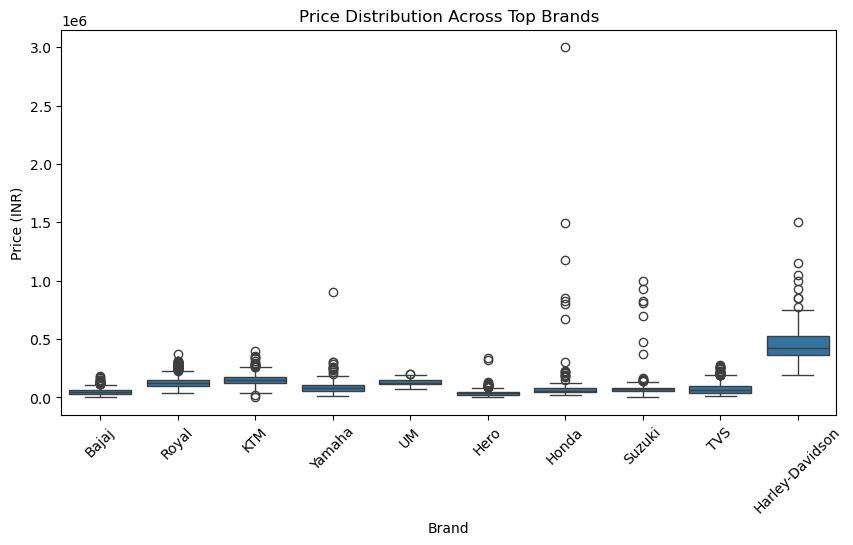

In [55]:
top_brands = df['brand'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    y='price'
)
plt.xticks(rotation=45)
plt.title("Price Distribution Across Top Brands")
plt.xlabel("Brand")
plt.ylabel("Price (INR)")
plt.show()

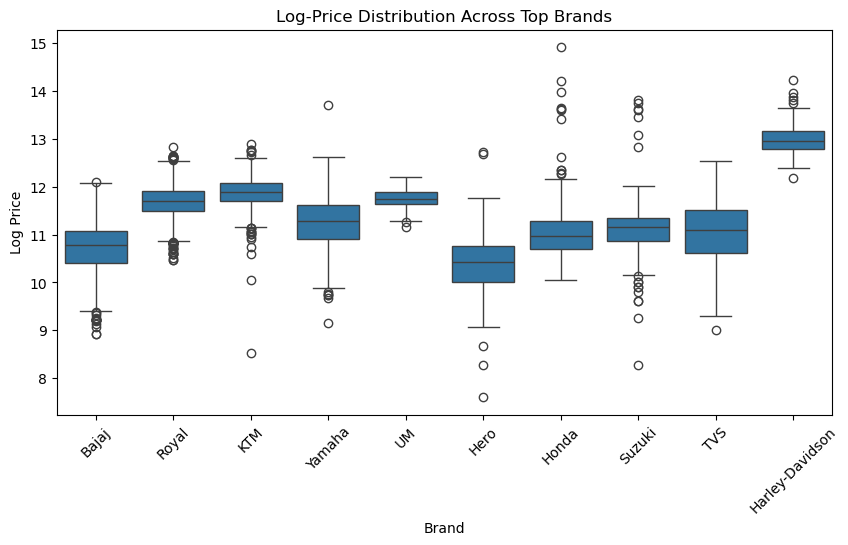

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    y='log_price'
)
plt.xticks(rotation=45)
plt.title("Log-Price Distribution Across Top Brands")
plt.xlabel("Brand")
plt.ylabel("Log Price")
plt.show()

In [57]:
valid_brands = df['brand'].value_counts()
valid_brands = valid_brands[valid_brands >= 50].index

df_filtered = df[df['brand'].isin(valid_brands)]

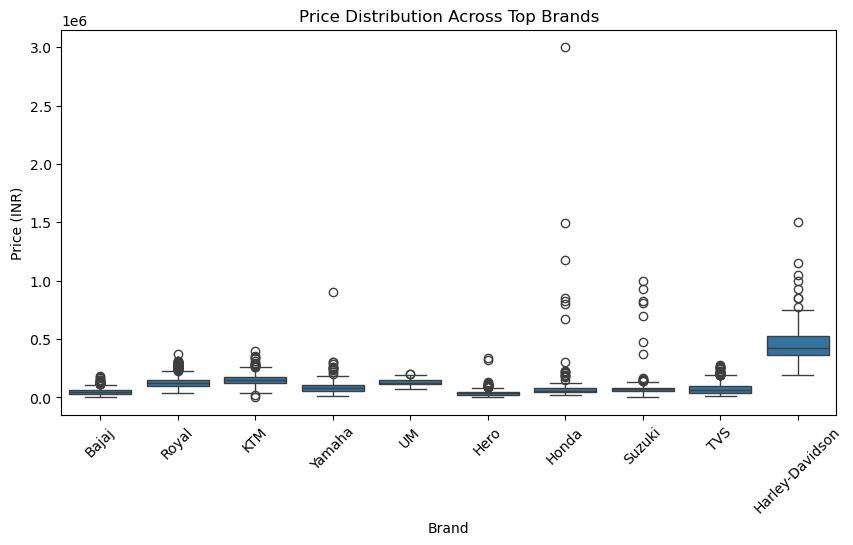

In [58]:
top_brands = df_filtered['brand'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_filtered[df_filtered['brand'].isin(top_brands)],
    x='brand',
    y='price'
)
plt.xticks(rotation=45)
plt.title("Price Distribution Across Top Brands")
plt.xlabel("Brand")
plt.ylabel("Price (INR)")
plt.show()

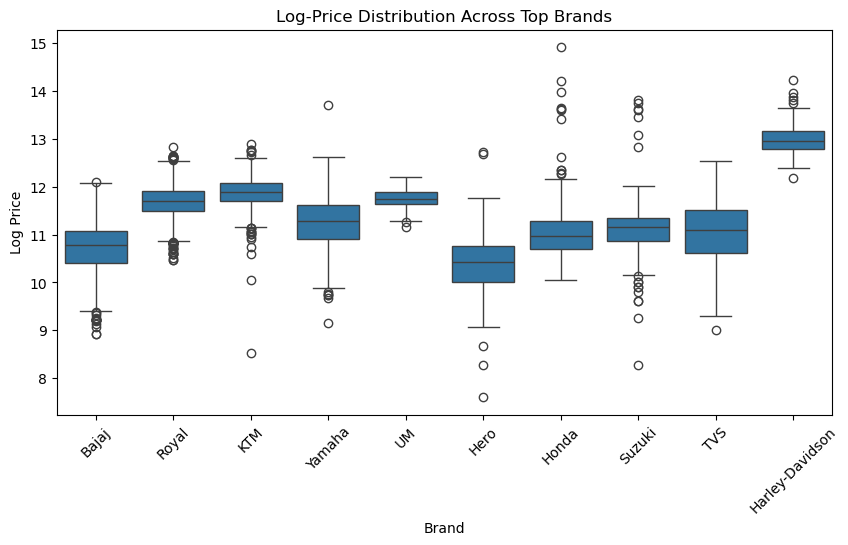

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_filtered[df_filtered['brand'].isin(top_brands)],
    x='brand',
    y='log_price'
)
plt.xticks(rotation=45)
plt.title("Log-Price Distribution Across Top Brands")
plt.xlabel("Brand")
plt.ylabel("Log Price")
plt.show()

In [60]:
df.loc[df['kms_bin'].isna(), 'kms_bin'] = '200k+'

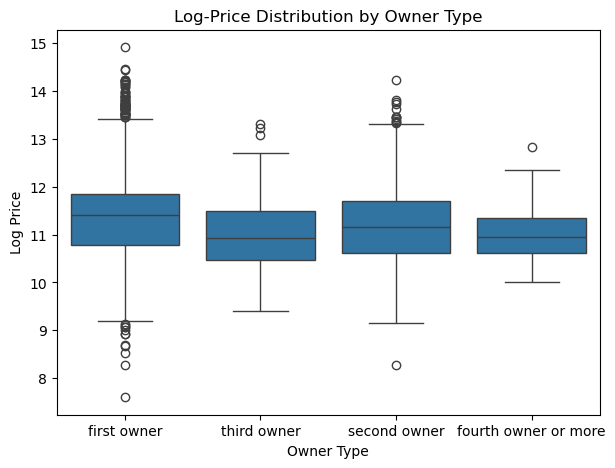

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(x='owner', y='log_price', data=df)
plt.title("Log-Price Distribution by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Log Price")
plt.show()

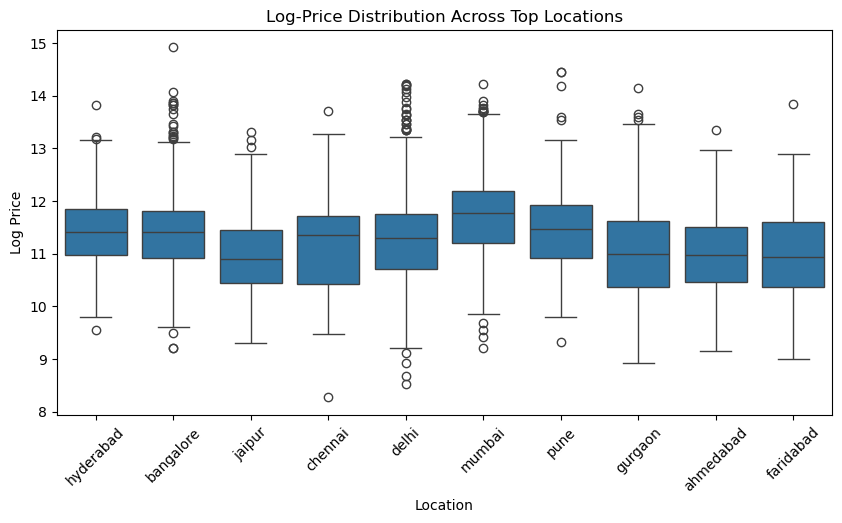

In [62]:
top_locations = df['location'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    x='location',
    y='log_price',
    data=df[df['location'].isin(top_locations)]
)
plt.xticks(rotation=45)
plt.title("Log-Price Distribution Across Top Locations")
plt.xlabel("Location")
plt.ylabel("Log Price")
plt.show()

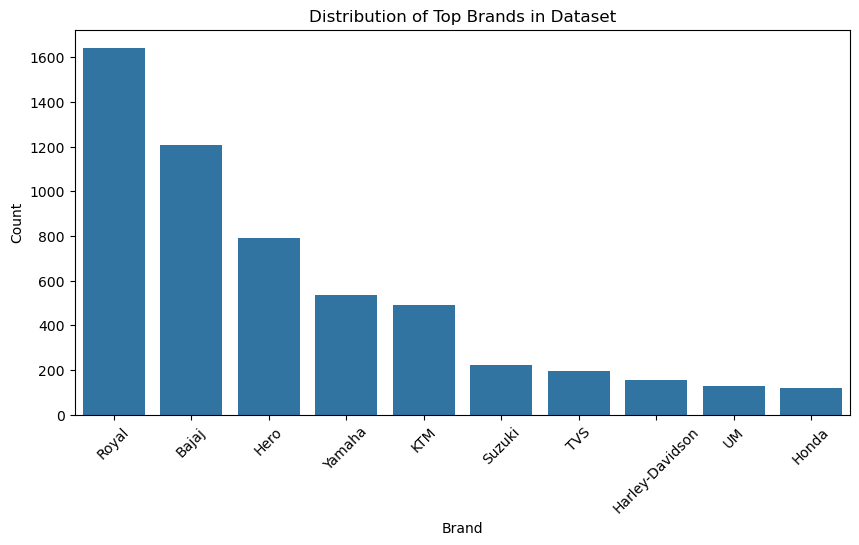

In [63]:
top_brands = df['brand'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.countplot(
    x='brand',
    data=df[df['brand'].isin(top_brands)],
    order=top_brands
)
plt.xticks(rotation=45)
plt.title("Distribution of Top Brands in Dataset")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

In [64]:
numeric_cols = [
    'price',
    'log_price',
    'model_year',
    'kms_driven',
    'mileage',
    'power'
]

corr_matrix = df[numeric_cols].corr()
corr_matrix

,price,log_price,model_year,kms_driven,mileage,power
price,1.000000,0.765223,0.224057,-0.201740,-0.439282,0.852108
log_price,0.765223,1.000000,0.464150,-0.331665,-0.622977,0.697077
model_year,0.224057,0.464150,1.000000,-0.321066,-0.128741,0.123892
kms_driven,-0.201740,-0.331665,-0.321066,1.000000,0.152895,-0.150551
mileage,-0.439282,-0.622977,-0.128741,0.152895,1.000000,-0.512167
power,0.852108,0.697077,0.123892,-0.150551,-0.512167,1.000000


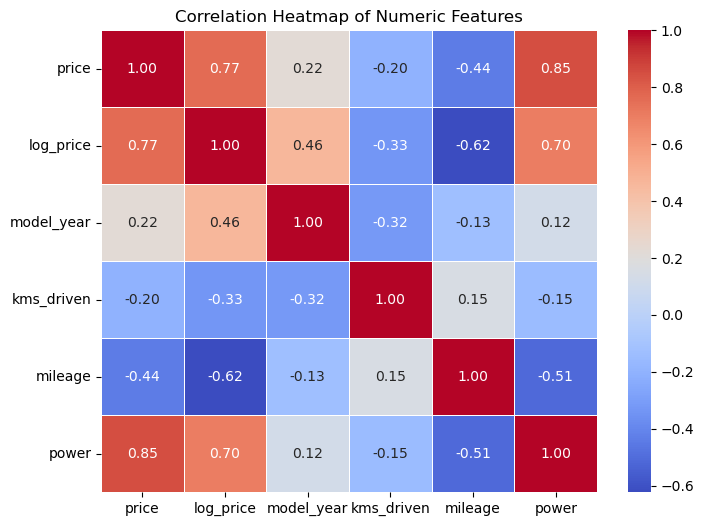

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price', 'log_price'])
y = df['log_price']

# Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Validation (15%) + Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

X_train.shape, X_val.shape, X_test.shape

((4071, 9), (872, 9), (873, 9))

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['model_year', 'kms_driven', 'mileage', 'power']
categorical_features = ['brand', 'owner', 'location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate(model, X, y):
    preds = model.predict(X)
    r2 = r2_score(y, preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    return r2, rmse

train_r2, train_rmse = evaluate(linreg_pipeline, X_train, y_train)
val_r2, val_rmse = evaluate(linreg_pipeline, X_val, y_val)
test_r2, test_rmse = evaluate(linreg_pipeline, X_test, y_test)

train_r2, val_r2, test_r2, train_rmse, val_rmse, test_rmse

(0.8757978288863624,
 0.8520373605091707,
 0.8679598675988296,
 0.2929302500606839,
 0.321615985353433,
 0.2981109993298969)

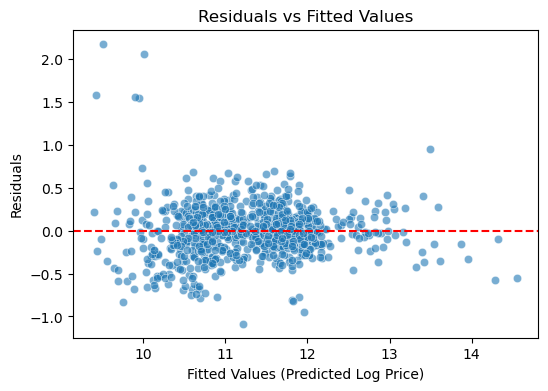

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions on test set
y_pred = linreg_pipeline.predict(X_test)

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted Log Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

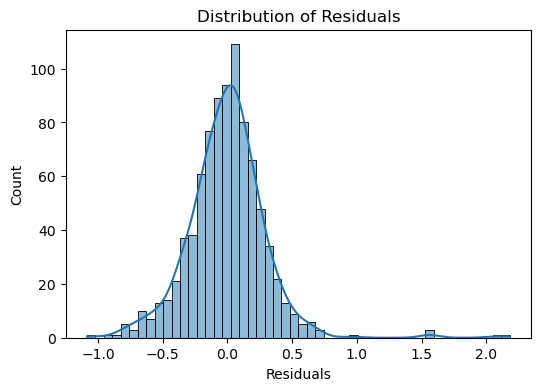

In [74]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

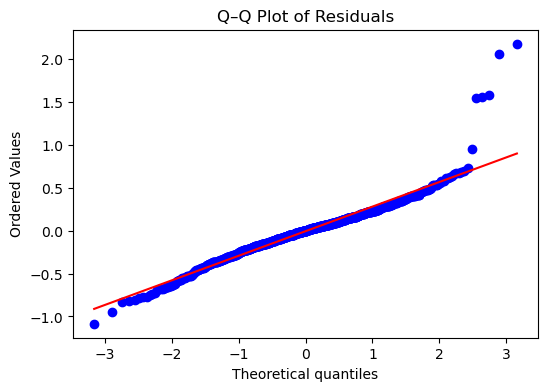

In [75]:
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

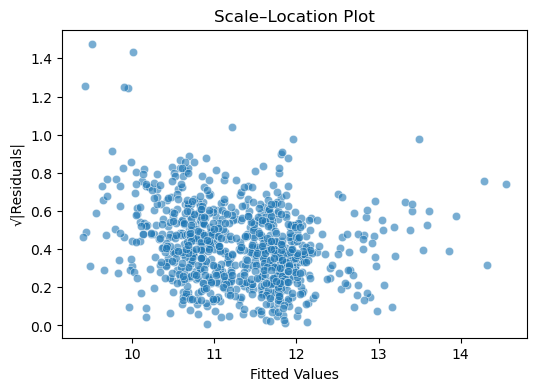

In [76]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=np.sqrt(np.abs(residuals)), alpha=0.6)
plt.xlabel("Fitted Values")
plt.ylabel("√|Residuals|")
plt.title("Scale–Location Plot")
plt.show()